In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import kurtosis,skew

from matplotlib.colors import LinearSegmentedColormap

In [2]:
data = pd.read_csv("Campus Placement.csv")
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Column Description

-   gender
-   ssc_p -> 10th class percentage
-   ssc_b -> 10th class board
-   hsc_p -> 12th class percentage
-   hsc_b -> 12th class board
-   hsc_s -> 12th class branch
-   degree_p -> undergraduate degree percentage
-   degree_t -> degree branch
-   workex -> work experience
-   etest_p -> Entrance test percentage
-   specialisation -> MBA branch
-   mba_p -> MBA percentage
-   status -> placement status
-   salary -> quoted salary

In [4]:
data.rename(columns = {'specialisation' : 'mba_t'}, inplace = True)

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  mba_t     215 non-null    object 
 11  mba_p     215 non-null    float64
 12  status    215 non-null    object 
 13  salary    148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


1. Salary has null values

In [7]:
data.fillna(0,inplace = True)

Filling them with zeros, which is acceptable technically and avoid NaN's

In [8]:
data['salary'].isna().sum()

0

- Feature selection
- Feature scaling
- Balancing
- Removing outliers
- Cross validation(common)

We're going to try out the following models
> - Naive Bayes
    - Independent contribution to the outcome(Less Multicolinearity)
    - If has *Zero Frequency* then apply Laplacian smoothing
    - Normal distribution
    - Feature selection
    - No Feature scaling
    - balancing
    - Remove outliers     
    
> - Logistic Regression
    - Little multicolinearity
    - No Derived or matched attributes
    - Existence of linearity between IV and log odds
    - typically requires a large number of records
    - Feature scaling
    - No Balancing
    - Remove outliers      
    
> - K Nearest Nieghbour
    - Works slow
    - Features should have the same wieghts(If not we have to z score the data)
    - Feature scaling
    - Cross validation
    - balancing
    - Remove outliers
    - Feature selection      
    
> - Linear SVM
    - Feature scaling (Z score)     
    - Removing Outliers
    - Small Dataset
    - hyperparameters
        - reduce ```c``` if it overfits
        - set loss to ```hinge```
        - dual hyperparameter to ```False```
        
> - Decision Tree

In [9]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [10]:
data['degree_t'] = data['degree_t'].replace('Comm&Mgmt', 'CommAndMgmt').replace('Sci&Tech', 'SciAndTech')
data['mba_t'] = data['mba_t'].replace('Mkt&Fin', 'MktAndFin').replace('Mkt&HR', 'MktAndHR')
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,SciAndTech,No,55.0,MktAndHR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,SciAndTech,Yes,86.5,MktAndFin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,CommAndMgmt,No,75.0,MktAndFin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,SciAndTech,No,66.0,MktAndHR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,CommAndMgmt,No,96.8,MktAndFin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,CommAndMgmt,No,91.0,MktAndFin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,SciAndTech,No,74.0,MktAndFin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,CommAndMgmt,Yes,59.0,MktAndFin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,CommAndMgmt,No,70.0,MktAndHR,60.23,Placed,204000.0


## Removing Outliers

In [11]:
Manual_Analysis = [42, 49, 120, 169, 206, 24, 134, 177, 197, 119, 150]
len(Manual_Analysis)

11

In [12]:
def Outlier(dataset,feature):
    shape1 = dataset.shape[0]                                 #taking the shape before removing outliers to keep track of no of outliers
    lst = sorted(dataset[feature])                            #taking a list of sorted values of that column
    
    quantile1, quantile3 = np.percentile(lst,[25,75])         #obtaining 25th and 75th percentile
    iqr_value = quantile3 - quantile1                         #finding inter-quartile value(difference)
    
    #obtaining lower bound and upper bound
    lower_bound_val = quantile1 - (1.5 * iqr_value)
    upper_bound_val = quantile3 + (1.5 * iqr_value)
    
    dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
    dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value
    
    return shape1-(dataset.shape[0])

In [13]:
outlier_free_data = data.copy()
print(outlier_free_data.shape)
for feature in ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']:
    shape1 = Outlier(outlier_free_data,feature)
    print('\n {} has {} outliers'.format(feature, shape1))
outlier_free_data.shape

(215, 14)

 ssc_p has 0 outliers

 hsc_p has 8 outliers

 degree_p has 1 outliers

 etest_p has 0 outliers

 mba_p has 0 outliers

 salary has 1 outliers


/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_1296/3958331934.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_1296/3958331934.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value


(205, 14)

Comparing the manual index count, we've a difference of only one (i.e..index no: 150)     

So, as for now, we can proceed with above results itself

## Reindexing

In [14]:
outlier_free_data.reset_index(drop=True, inplace = True)
outlier_free_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,SciAndTech,No,55.0,MktAndHR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,SciAndTech,Yes,86.5,MktAndFin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,CommAndMgmt,No,75.0,MktAndFin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,SciAndTech,No,66.0,MktAndHR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,CommAndMgmt,No,96.8,MktAndFin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,M,80.60,Others,82.00,Others,Commerce,77.60,CommAndMgmt,No,91.0,MktAndFin,74.49,Placed,400000.0
201,M,58.00,Others,60.00,Others,Science,72.00,SciAndTech,No,74.0,MktAndFin,53.62,Placed,275000.0
202,M,67.00,Others,67.00,Others,Commerce,73.00,CommAndMgmt,Yes,59.0,MktAndFin,69.72,Placed,295000.0
203,F,74.00,Others,66.00,Others,Commerce,58.00,CommAndMgmt,No,70.0,MktAndHR,60.23,Placed,204000.0


## Creating Dummies

In [15]:
data_copy = outlier_free_data.copy()

cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_copy[var], prefix=var)
    data1=data_copy.join(cat_list)
    data_copy = data1
    
cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
data_vars=data_copy.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [16]:
encoded_data=data_copy[to_keep]
encoded_status = encoded_data['status'].replace('Not Placed', 0).replace('Placed', 1)
encoded_data.drop(['status', 'salary'], axis = 1, inplace = True)
encoded_data

/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_1296/897080279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_data.drop(['status', 'salary'], axis = 1, inplace = True)


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_CommAndMgmt,degree_t_Others,degree_t_SciAndTech,workex_No,workex_Yes,mba_t_MktAndFin,mba_t_MktAndHR
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,80.60,82.00,77.60,91.0,74.49,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
201,58.00,60.00,72.00,74.0,53.62,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
202,67.00,67.00,73.00,59.0,69.72,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
203,74.00,66.00,58.00,70.0,60.23,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [17]:
encoded_status

0      1
1      1
2      1
3      0
4      1
      ..
200    1
201    1
202    1
203    1
204    0
Name: status, Length: 205, dtype: int64

## Train_Test_Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_data, encoded_status, test_size=0.20, random_state=42)

## All Base Models

### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
base_model = GaussianNB()
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 9,  5],
       [ 2, 25]])

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/varun/DS/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 8,  6],
       [ 2, 25]])

### K Nearest Neighbour

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 4, 10],
       [ 3, 24]])

### Linear SVM

In [25]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear')  
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 9,  5],
       [ 2, 25]])

### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 3, 11],
       [ 4, 23]])

Comparing all models, **Naive-bayes** and **Linear SVM** will gives the higher scores. So, first, we'll concentrate on Naive Bayes
- *Logistic Regression* has a moderate score. We'll look into it after naive-bayes and SVM.
- Among all models, *Decision tree* and *KNN* has the least score. So, we ignore it.

### Balancing using SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)

columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train.ravel())

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of data before oversampling is ",len(X_train))
print("length of data after oversampling is ",len(os_data_X))
print('')
print("Number of Placed in data before oversampling is ", len(y_train[y_train==1]))
print("Number of Not Placed in data before oversampling is ", len(y_train[y_train==0]))
print('')
print("Number of Placed in oversampled data",len(os_data_y[os_data_y['y']==1]))
print("Number of Not Placed in oversampled data",len(os_data_y[os_data_y['y']==0]))
print('')
print("Proportion of Placed data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print("Proportion of Not Placed data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))

length of data before oversampling is  164
length of data after oversampling is  232

Number of Placed in data before oversampling is  116
Number of Not Placed in data before oversampling is  48

Number of Placed in oversampled data 116
Number of Not Placed in oversampled data 116

Proportion of Placed data in oversampled data is  0.5
Proportion of Not Placed data in oversampled data is  0.5


In [30]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(164, 21) (41, 21)
(164,) (41,)


In [31]:
print(os_data_X.shape)
print(os_data_y.shape)

(232, 21)
(232, 1)


### Naive Bayes

#### Base Model

In [32]:
from sklearn.naive_bayes import GaussianNB
base_model = GaussianNB()
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

predict_train = base_model.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.823170731707317
accuracy_score on test dataset :  0.8292682926829268


>  The accuracy scores of both Training set and testing set are almost the same, which means there is no overfitting with this model

In [34]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 9,  5],
       [ 2, 25]])

<AxesSubplot:>

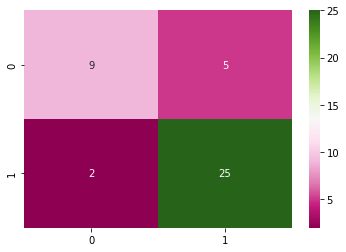

In [35]:
sns.heatmap(conf_mat, annot=True,cmap="PiYG")

- Precision - gives value for FP
- Recall - gives value for FN

In our data, Recall should be our major focus because,        
There is no problem if a guy is said that he's placed where he's actually not, whereas, There is a problem if a guy is said that he's not placed where he's actually placed

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
 
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.829
Precision: 0.833
Recall: 0.926
F1 Score: 0.877


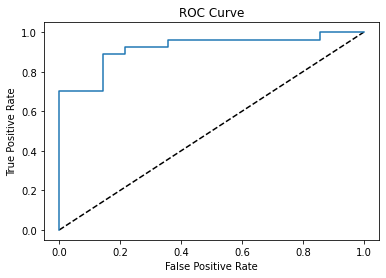

AUC =  0.9206349206349206


In [37]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_prob = base_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC = ", auc)

### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

cross_val_model = GaussianNB()

# metrics.get_scorer_names()   ---> for strings of scoring parameter

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="accuracy")
meanScore = scores.mean()
print("accuracy = ", meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="precision")
meanScore = scores.mean()
print("precision = ", meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="recall")
meanScore = scores.mean()
print("recall = ", meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="f1")
meanScore = scores.mean()
print('F1 score = ', meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="roc_auc")
meanScore = scores.mean()
print('AUC ROC = ', meanScore )

accuracy =  0.7560975609756098
precision =  0.8520723841376017
recall =  0.7901477832512316
F1 score =  0.8172736858430352
AUC ROC =  0.8470885436402676


> Cross Validation is considerably reducing the scores

### Balanced Model

In [39]:
from sklearn.naive_bayes import GaussianNB
balanced_model = GaussianNB()
balanced_model.fit(os_data_X, os_data_y['y'])
y_pred = balanced_model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

predict_train = balanced_model.predict(os_data_X)

# Accuray Score on train dataset
accuracy_train = accuracy_score(os_data_y['y'],predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8448275862068966
accuracy_score on test dataset :  0.8048780487804879


> Balancing the data set is resulting in overfitting. So, models with balanced data set may result in false result

In [41]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 8,  6],
       [ 2, 25]])

<AxesSubplot:>

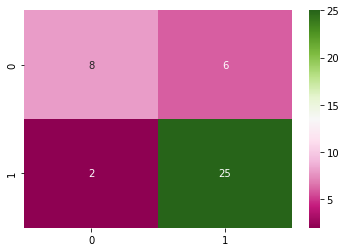

In [42]:
sns.heatmap(conf_mat, annot=True,cmap="PiYG")

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.805
Precision: 0.806
Recall: 0.926
F1 Score: 0.862


#### Base Model

Accuracy: 0.829       
Precision: 0.833      
Recall: 0.926      
F1 Score: 0.877   

Only the precision is slightly affected. In our case, we're more concerned about the recall (which didn't get affected)

So, as of now, we'll keep these scores as it is and proceed with base model.

### Feature Selection

#### Significance with *status*

- ['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p']
- ['workex', 'mba_t', 'degree_t', 'gender']         
equal - ['ssc_b', 'hsc_b', 'hsc_s']

In [44]:
pd.set_option('display.max_columns', None)
encoded_data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_CommAndMgmt,degree_t_Others,degree_t_SciAndTech,workex_No,workex_Yes,mba_t_MktAndFin,mba_t_MktAndHR
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,80.60,82.00,77.60,91.0,74.49,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
201,58.00,60.00,72.00,74.0,53.62,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
202,67.00,67.00,73.00,59.0,69.72,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
203,74.00,66.00,58.00,70.0,60.23,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [46]:
select_data_X = encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex_No', 'workex_Yes', 'mba_t_MktAndFin', 'mba_t_MktAndHR', 'degree_t_CommAndMgmt', 'degree_t_Others', 'degree_t_SciAndTech']]
select_data_X

,ssc_p,degree_p,mba_p,hsc_p,workex_No,workex_Yes,mba_t_MktAndFin,mba_t_MktAndHR,degree_t_CommAndMgmt,degree_t_Others,degree_t_SciAndTech
0,67.00,58.00,58.80,91.00,1,0,0,1,0,0,1
1,79.33,77.48,66.28,78.33,0,1,1,0,0,0,1
2,65.00,64.00,57.80,68.00,1,0,1,0,1,0,0
3,56.00,52.00,59.43,52.00,1,0,0,1,0,0,1
4,85.80,73.30,55.50,73.60,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
200,80.60,77.60,74.49,82.00,1,0,1,0,1,0,0
201,58.00,72.00,53.62,60.00,1,0,1,0,0,0,1
202,67.00,73.00,69.72,67.00,0,1,1,0,1,0,0
203,74.00,58.00,60.23,66.00,1,0,0,1,1,0,0


In [47]:
select_data_y = encoded_status
select_data_y

0      1
1      1
2      1
3      0
4      1
      ..
200    1
201    1
202    1
203    1
204    0
Name: status, Length: 205, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(select_data_X, select_data_y, test_size=0.20, random_state=42)

In [50]:
from sklearn.naive_bayes import GaussianNB
select_model = GaussianNB()
select_model.fit(X_train_sel, y_train_sel)
y_pred_sel = select_model.predict(X_test_sel)

In [51]:
from sklearn.metrics import accuracy_score

predict_train = select_model.predict(X_train_sel)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train_sel,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test_sel,y_pred_sel)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8597560975609756
accuracy_score on test dataset :  0.8780487804878049


In [52]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_sel, y_pred_sel)
conf_mat

array([[10,  4],
       [ 1, 26]])

<AxesSubplot:>

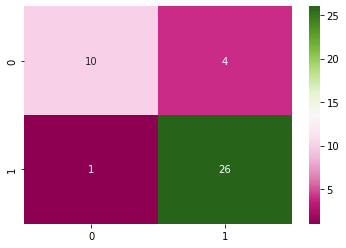

In [53]:
sns.heatmap(conf_mat, annot=True,cmap="PiYG")

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test_sel, y_pred_sel))
print('Precision: %.3f' % precision_score(y_test_sel, y_pred_sel))
print('Recall: %.3f' % recall_score(y_test_sel, y_pred_sel))
print('F1 Score: %.3f' % f1_score(y_test_sel, y_pred_sel))

Accuracy: 0.878
Precision: 0.867
Recall: 0.963
F1 Score: 0.912


### Results of Feature Selection

#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender', 'etest_p', 'ssc_b', 'hsc_b', 'hsc_s']]       

    array([[ 9,  5],
           [ 2, 25]]       
   
    Accuracy: 0.829
    Precision: 0.833
    Recall: 0.926
    F1 Score: 0.877
    AUC =  0.9206349206349206
    
#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender', 'ssc_b', 'hsc_b', 'hsc_s']]      

    array([[ 9,  5],
           [ 2, 25]]

    Accuracy: 0.829
    Precision: 0.833
    Recall: 0.926
    F1 Score: 0.877
    AUC =  0.9206349206349206
    
#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender', 'etest_p']]        

    array([[ 9,  5],
           [ 1, 26]]

    Accuracy: 0.854
    Precision: 0.839
    Recall: 0.963
    F1 Score: 0.897 
    AUC =  0.9259259259259258

#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender']]      

    array([[ 9,  5],
           [ 1, 26]]

    Accuracy: 0.854
    Precision: 0.839
    Recall: 0.963
    F1 Score: 0.897 
    AUC =  0.9259259259259258
    
#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'workex', 'mba_t', 'degree_t', 'gender']]         

    array([[10,  4],
           [ 2, 25]]

    Accuracy: 0.854
    Precision: 0.862
    Recall: 0.926
    F1 Score: 0.893
    
#### **encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t']]**           

    array([[10,  4],
           [ 1, 26]]

    Accuracy: 0.878
    Precision: 0.867
    Recall: 0.963
    F1 Score: 0.912

#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'workex', 'mba_t', 'degree_t']]     

    array([[ 9,  5],
           [ 3, 24]]

    Accuracy: 0.805
    Precision: 0.828
    Recall: 0.889
    F1 Score: 0.857

### Balanced Model with Feature Selection

In [56]:
os_data_X = os_data_X[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex_No', 'workex_Yes', 'mba_t_MktAndFin', 'mba_t_MktAndHR', 'degree_t_CommAndMgmt', 'degree_t_Others', 'degree_t_SciAndTech', 'gender_F', 'gender_M','ssc_b_Central','ssc_b_Others']]
os_data_X

,ssc_p,degree_p,mba_p,hsc_p,workex_No,workex_Yes,mba_t_MktAndFin,mba_t_MktAndHR,degree_t_CommAndMgmt,degree_t_Others,degree_t_SciAndTech,gender_F,gender_M,ssc_b_Central,ssc_b_Others
0,73.000000,66.000000,68.070000,73.000000,0,1,1,0,0,0,1,0,1,1,0
1,65.000000,69.000000,55.010000,68.000000,1,0,0,1,1,0,0,0,1,1,0
2,52.000000,58.000000,60.590000,49.000000,1,0,0,1,1,0,0,0,1,1,0
3,54.000000,63.000000,59.470000,82.000000,1,0,1,0,0,0,1,0,1,1,0
4,81.000000,64.000000,62.560000,68.000000,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,68.270345,65.374582,67.589732,62.312709,1,0,0,0,0,0,0,0,0,1,0
228,54.205766,51.055666,62.525316,53.364037,0,0,0,0,0,0,0,0,0,0,0
229,59.294790,61.310173,64.995733,73.663522,1,0,0,0,0,0,0,0,0,0,0
230,55.471117,60.695516,64.863473,64.974349,1,0,0,0,1,0,0,1,0,0,0


In [57]:
X_test = X_test[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex_No', 'workex_Yes', 'mba_t_MktAndFin', 'mba_t_MktAndHR', 'degree_t_CommAndMgmt', 'degree_t_Others', 'degree_t_SciAndTech', 'gender_F', 'gender_M','ssc_b_Central','ssc_b_Others']]
X_test.head()

,ssc_p,degree_p,mba_p,hsc_p,workex_No,workex_Yes,mba_t_MktAndFin,mba_t_MktAndHR,degree_t_CommAndMgmt,degree_t_Others,degree_t_SciAndTech,gender_F,gender_M,ssc_b_Central,ssc_b_Others
15,65.0,69.0,64.66,75.00,0,1,1,0,1,0,0,1,0,1,0
9,58.0,61.0,52.21,70.00,1,0,1,0,1,0,0,0,1,1,0
100,73.0,73.0,65.83,78.00,0,1,0,1,0,0,1,0,1,1,0
132,82.0,73.0,71.77,64.00,0,1,1,0,0,0,1,1,0,0,1
68,75.0,71.0,66.94,70.29,1,0,1,0,1,0,0,0,1,0,1


In [58]:
from sklearn.naive_bayes import GaussianNB
balanced_model = GaussianNB()
balanced_model.fit(os_data_X, os_data_y['y'])
y_pred = balanced_model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[10,  4],
       [ 2, 25]])

<AxesSubplot:>

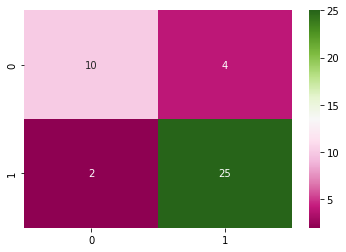

In [60]:
sns.heatmap(conf_mat, annot=True,cmap="PiYG")

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.854
Precision: 0.862
Recall: 0.926
F1 Score: 0.893


#### Base Model with Feature selection

Accuracy: 0.878    
Precision: 0.867     
Recall: 0.963    
F1 Score: 0.912 

> Even after many tries, there are no good results as like with base model and feature selection    
- As of now, the above one is the best result out of all tries on balanced model and feature selection.

## Hyper parameter tuning

### Presenting best model as of now

In [62]:
selec_data_X = encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex_No', 'workex_Yes', 'mba_t_MktAndFin', 'mba_t_MktAndHR', 'degree_t_CommAndMgmt', 'degree_t_Others', 'degree_t_SciAndTech']]
selec_data_X

,ssc_p,degree_p,mba_p,hsc_p,workex_No,workex_Yes,mba_t_MktAndFin,mba_t_MktAndHR,degree_t_CommAndMgmt,degree_t_Others,degree_t_SciAndTech
0,67.00,58.00,58.80,91.00,1,0,0,1,0,0,1
1,79.33,77.48,66.28,78.33,0,1,1,0,0,0,1
2,65.00,64.00,57.80,68.00,1,0,1,0,1,0,0
3,56.00,52.00,59.43,52.00,1,0,0,1,0,0,1
4,85.80,73.30,55.50,73.60,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
200,80.60,77.60,74.49,82.00,1,0,1,0,1,0,0
201,58.00,72.00,53.62,60.00,1,0,1,0,0,0,1
202,67.00,73.00,69.72,67.00,0,1,1,0,1,0,0
203,74.00,58.00,60.23,66.00,1,0,0,1,1,0,0


In [63]:
selec_data_y = encoded_status
selec_data_y

0      1
1      1
2      1
3      0
4      1
      ..
200    1
201    1
202    1
203    1
204    0
Name: status, Length: 205, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(selec_data_X, selec_data_y, test_size=0.20, random_state=42)

In [65]:
from sklearn.naive_bayes import GaussianNB
select_model = GaussianNB()
select_model.fit(X_train_sel, y_train_sel)
y_pred_sel = select_model.predict(X_test_sel)

In [66]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_sel, y_pred_sel)
conf_mat

array([[10,  4],
       [ 1, 26]])

<AxesSubplot:>

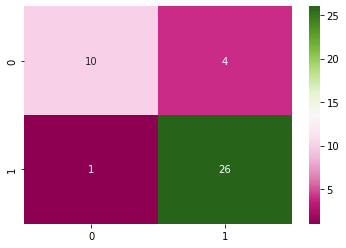

In [67]:
sns.heatmap(conf_mat, annot=True,cmap="PiYG")

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test_sel, y_pred_sel))
print('Precision: %.3f' % precision_score(y_test_sel, y_pred_sel))
print('Recall: %.3f' % recall_score(y_test_sel, y_pred_sel))
print('F1 Score: %.3f' % f1_score(y_test_sel, y_pred_sel))

Accuracy: 0.878
Precision: 0.867
Recall: 0.963
F1 Score: 0.912


In [69]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=select_model, 
                     param_grid=params_NB, 
                     verbose=1, 
                     scoring='accuracy')


gs_NB.fit(X_train_sel, y_train_sel);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [70]:
gs_NB.best_params_

{'var_smoothing': 0.04328761281083057}

In [71]:
gs_NB.best_score_

0.878409090909091

In [72]:
gs_NB.score(X_train_sel, y_train_sel)

0.8780487804878049

In [73]:
gs_NB.score(X_test_sel, y_test_sel)

0.7317073170731707

> As the data is too small, The model tends to overfit

Now the best model is, ```select_model```

In [74]:
import pickle

filename = 'status_model.pkl'
pickle.dump(select_model, open(filename, 'wb'))